In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
#Download Historical Data
def download_data(ticker='BTC-USD', start='2019-01-01', end='2024-01-01'):
    df = yf.download(ticker, start=start, end=end)
    return df


In [4]:
#Add Technical Indicators
def add_features(df):
    df['SMA_10'] = df['Close'].rolling(window=10).mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['Volatility'] = df['Close'].rolling(window=10).std()
    df['Lag_1'] = df['Close'].shift(1)
    df.dropna(inplace=True)
    return df

In [5]:
#RSI (Relative Strength Index)
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

/var/folders/31/lgt9j43560s8c0nc1hvh5yxw0000gn/T/ipykernel_74676/4291510197.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Mean Absolute Error: 554.08


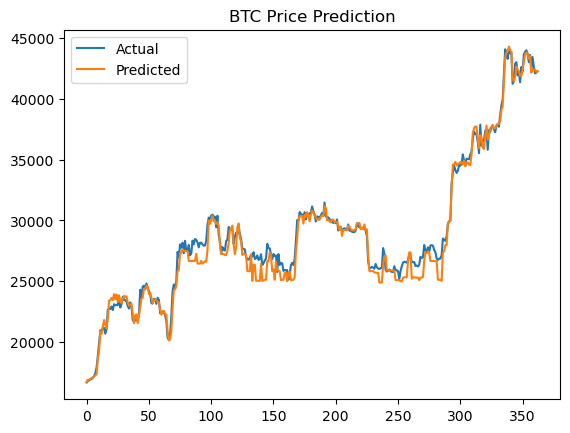

In [8]:
#Train & Evaluate Model
def train_model(df):
    features = ['Open', 'High', 'Low', 'SMA_10', 'EMA_10', 'RSI', 'Volatility', 'Lag_1']
    X = df[features]
    y = df['Close']

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    model = XGBRegressor(n_estimators=100, learning_rate=0.05)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    print(f"Mean Absolute Error: {mae:.2f}")

    plt.plot(y_test.values, label='Actual')
    plt.plot(preds, label='Predicted')
    plt.legend()
    plt.title("BTC Price Prediction")
    plt.show()

    return model

if __name__ == "__main__":
    df = download_data()
    df = add_features(df)
    model = train_model(df)